In [1]:
import numpy as np
import scipy.io as io
# import all other relevant packages here
import matplotlib.pyplot as plt
import copy

/home/umityigitbsrn/miniconda3/envs/pytorch-stable/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def softmax(preds: np.ndarray) -> np.ndarray:
    """
    Args:
        preds: nxk input where n is sample size and k is number of class

    Returns:
        result: nxk output
    """
    exp_preds = np.exp(preds)
    sum_preds = np.sum(exp_preds, axis=1, keepdims=True)
    return exp_preds / sum_preds

def logistic_gradient(data: np.ndarray, onehot_label: np.ndarray, weights: np.ndarray) -> np.ndarray:
    """

    Args:
        data: nxd input where d is num of features
        onehot_label: nxk where k is num of class
        weights: dxk

    Returns:
        grad: dxk output gradient
    """
    return data.T @ (softmax(data @ weights) - onehot_label)

def apply_gradients(x, l, theta_arg, lr_arg):
  # x is a matrix of size n_samples x n_feature
  # l is a vector of size n_samples x n_class
  # theta is a matrix of size n_feature x n_class
  # lr is the learning rate
  # returns  weights in the variable new_theta 

  # FILL IN
  new_theta = theta_arg - (lr_arg * logistic_gradient(x, l, theta_arg))
  return new_theta

def accuracy(test_data, test_label, weights):
    y_pred = softmax(test_data @ weights)
    preds = np.argmax(y_pred, axis=1)
    return np.count_nonzero(preds == np.argmax(test_label, axis=1)) / test_data.shape[0]

def loss_fnc(data, onehot_label, weights):
    trace = np.trace(onehot_label @ np.log(softmax(data @ weights).T))
    return -1 * trace / data.shape[0]

In [3]:
def getROC(pred,gt):
    # gt is the ground truth vector of 1 or 0 of size n_samples x 1. 1 indicates a positive and 0 negative
    # pred is a vector of predictions of size n_samples x 1
    # TPR is the True Positive Rate
    # FPR is the False Positive Rate
    # returns TPR and FPR

    pred, gt = pred.squeeze(), gt.squeeze()

    # Sort the predictions in descending order
    sorted_idx = np.argsort(pred)[::-1]
    pred = pred[sorted_idx]
    gt = gt[sorted_idx]

    # Calculate the true positive rate (TPR) and false positive rate (FPR) for different thresholds
    tpr_list = []
    fpr_list = []
    for idx_roc in range(len(gt)):
        threshold = pred[idx_roc]
        tp = np.sum((gt == 1) & (pred >= threshold))
        fp = np.sum((gt == 0) & (pred >= threshold))
        tn = np.sum((gt == 0) & (pred < threshold))
        fn = np.sum((gt == 1) & (pred < threshold))
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return tpr_list, fpr_list

In [4]:
# DO NOT MODIFY ANYTHING IF NOT MENTIONED

# write code to load subset.mat
subset = io.loadmat('subset.mat')['subset']

In [5]:
# write code to load feature matrix from ucf101dataset.mat
all_features = io.loadmat('../3/ucf101dataset.mat')

trlabelidx =  np.where(subset=='training')[0]
telabelidx =  np.where(subset=='testing ')[0]

In [6]:
# write code to get training and testing labels and features based on the above indices
trfeature = all_features['feature'][trlabelidx]
tefeature = all_features['feature'][telabelidx]
trlabel = all_features['label'].squeeze()[trlabelidx]
telabel = all_features['label'].squeeze()[telabelidx]
print('train feature size: {}, label size: {}'.format(trfeature.shape, trlabel.shape))
print('test feature size: {}, label size: {}'.format(tefeature.shape, telabel.shape))

train feature size: (9537, 2048), label size: (9537,)
test feature size: (3783, 2048), label size: (3783,)


In [7]:
batchsize= 32 # FILL IN AND MODIFY TO SEE CHANGE IN PERFORMANCE
lr = 0.01 # FILL IN AND MODIFY TO SEE CHANGE IN PERFORMANCE
classlist = np.unique(trlabel)
num_of_feature = trfeature.shape[1]
num_of_class = len(classlist)

In [8]:
# write code to convert trlabel and telabel to one hot vectors with dimensions no of samples x number of categories
trlabel1hot = np.zeros((trlabel.shape[0], num_of_class))
for idx, label in enumerate(trlabel):
    trlabel1hot[idx, label] = 1
telabel1hot = np.zeros((telabel.shape[0], num_of_class))
for idx, label in enumerate(telabel):
    telabel1hot[idx, label] = 1
print('train one hot label size: {}, test one hot label size: {}'.format(trlabel.shape, telabel.shape))

train one hot label size: (9537,), test one hot label size: (3783,)


epoch: 1, acc: 0.059212265397832406
epoch: 2, acc: 0.1176315093840867
epoch: 3, acc: 0.19957705524715835
epoch: 4, acc: 0.23790642347343377
epoch: 5, acc: 0.31007137192704204
epoch: 6, acc: 0.3745704467353952
epoch: 7, acc: 0.41263547449114457
epoch: 8, acc: 0.4345757335448057
epoch: 9, acc: 0.4425059476605868
epoch: 10, acc: 0.45889505683320114
epoch: 11, acc: 0.4956383822363204
epoch: 12, acc: 0.48850118953211735
epoch: 13, acc: 0.5093840867036743
epoch: 14, acc: 0.528416600581549
epoch: 15, acc: 0.5167856198784034
epoch: 16, acc: 0.5313243457573354
epoch: 17, acc: 0.5514142215173143
epoch: 18, acc: 0.5532646048109966
epoch: 19, acc: 0.5395189003436426
epoch: 20, acc: 0.5601374570446735
epoch: 21, acc: 0.5667459688078245
epoch: 22, acc: 0.5693893735130848
epoch: 23, acc: 0.5738831615120275
epoch: 24, acc: 0.5849854612741211
epoch: 25, acc: 0.5746761829236056
epoch: 26, acc: 0.5863071636267513
epoch: 27, acc: 0.5852498017446471
epoch: 28, acc: 0.591329632566746
epoch: 29, acc: 0.60930

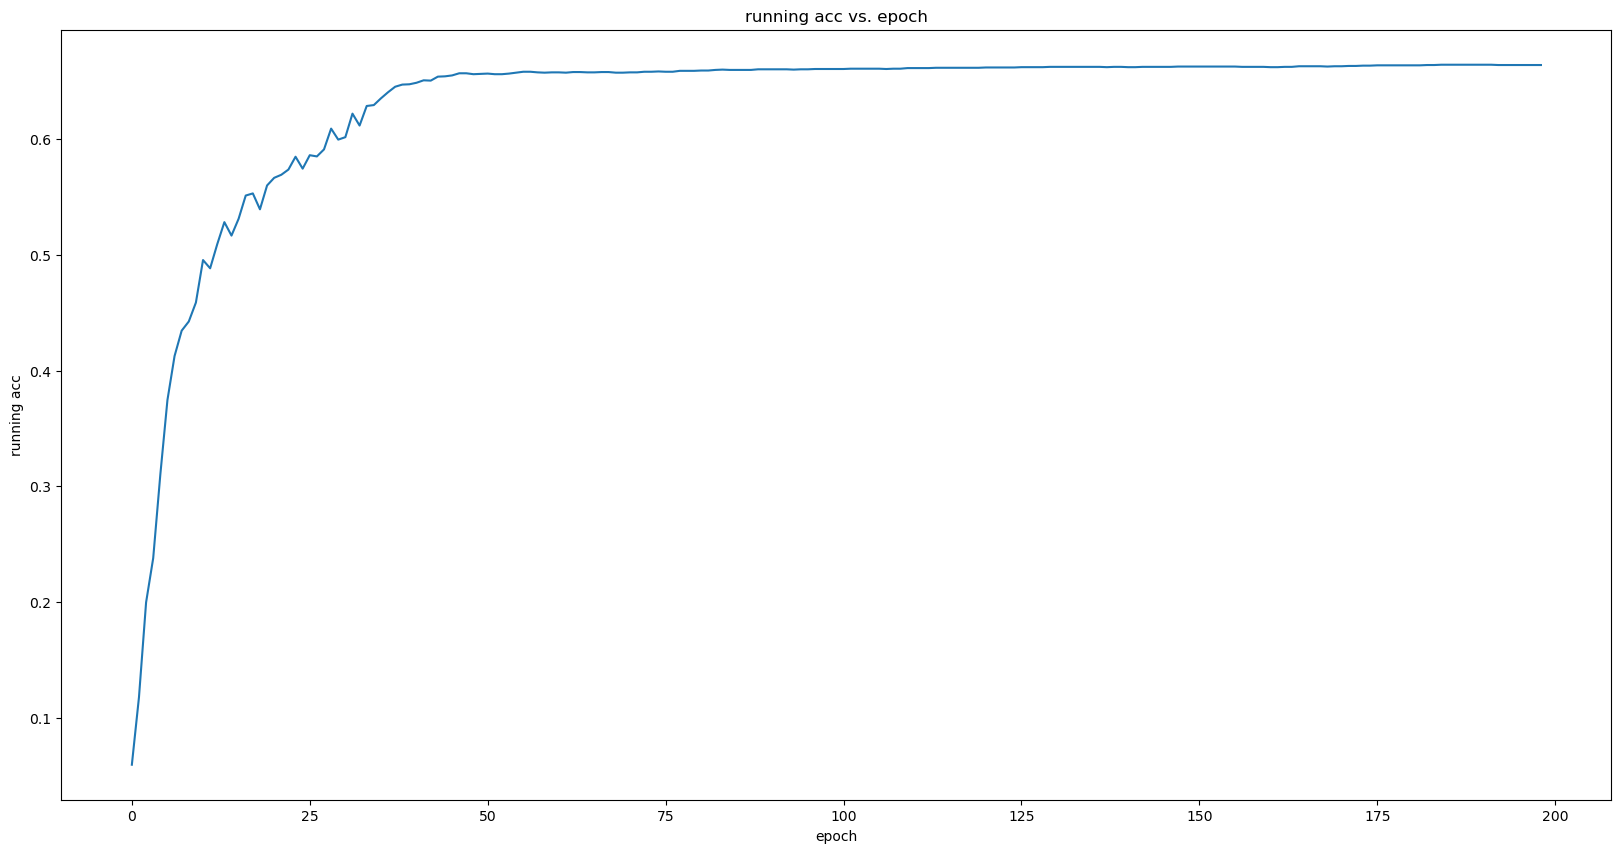

In [9]:
theta =  np.zeros((num_of_feature, num_of_class)) # INITIALIZE  FILL IN
diff = 1
epoch = 1 

running_acc = []
while diff > 1e-10 and epoch < 200:
    theta_old = copy.deepcopy(theta)
    
    # Train
    for i in range (1,len(trlabel),batchsize):
        endpos = min(len(trlabel)-1,i+batchsize)
        loss = loss_fnc(trfeature[i:endpos,:],trlabel1hot[i:endpos,:],theta)
        theta = apply_gradients(trfeature[i:endpos,:],trlabel1hot[i:endpos,:],theta,lr)

    diff = np.linalg.norm(theta_old-theta)
    
    # Write code for prediction  
    
    # FILL IN TO ASSIGN test accuracy to variable test_accuracy using the prediction made above
    test_accuracy = accuracy(tefeature, telabel1hot, theta)
    running_acc.append(test_accuracy)
    print('epoch: {}, acc: {}'.format(epoch, test_accuracy))
    epoch = epoch + 1

plt.figure(figsize=(20, 10))
plt.plot(list(range(epoch - 1)), running_acc)
plt.xlabel('epoch')
plt.ylabel('running acc')
plt.title('running acc vs. epoch')
plt.show()

final test accuracy: 0.6642876024319323


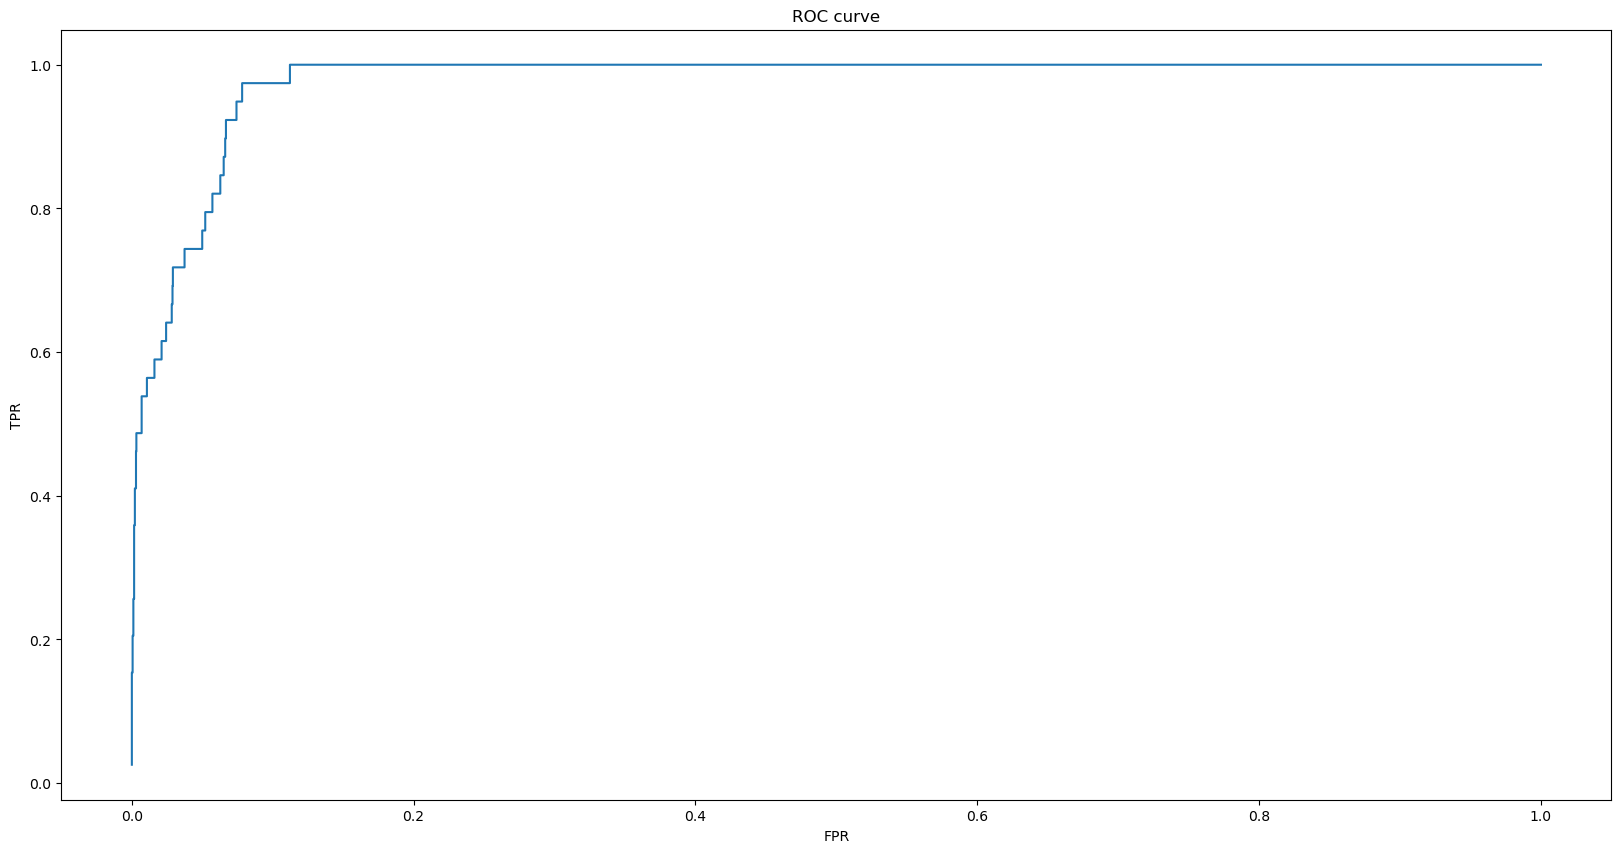

In [10]:
# # Print final test accuracy
print('final test accuracy: {}'.format(running_acc[-1]))
#
# # FILL IN THE FIRST ARGUMENT  SHOULD BE A COLUMN VECTOR CONTAINING THE 50th CATEGORY PREDICTION
softmax_app = softmax(tefeature @ theta)
preds_50 = softmax_app[:, 50]
TPR, FPR = getROC(preds_50, telabel1hot[:, 50])

#
# # PLOT TPR VS FPR CURVE HERE
plt.figure(figsize=(20, 10))
plt.plot(FPR, TPR)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()